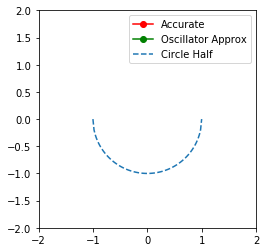

In [2]:
# To plot a animated oscillator
# Use to spot, one spot is fixed at the origin and the
# other is moving
# The new version is to write the code with class definition
# import necessary library
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from scipy.integrate import odeint

# Define the parameters
theta_0 = -np.pi/3
R = 1.0
g = 9.8
coe = 1

# Define the differential equations


def evo_accu(z, t, g, R, coe):
    v = z[0]
    theta = z[1]
    dtheta = v/R
    dv = -coe*g*np.sin(theta)
    dzdt = [dv, dtheta]
    return dzdt


def evo_osci(z, t, g, R, coe):
    v = z[0]
    theta = z[1]
    dtheta = v/R
    dv = -coe*g*theta
    dzdt = [dv, dtheta]
    return dzdt


t_max = 1.0/R*g*1
numt = 500
tmat = np.linspace(0, t_max, numt)
z0 = [0, theta_0]
theta_accu = odeint(evo_accu, z0, tmat, args=(g, R, coe))
theta_osci = odeint(evo_osci, z0, tmat, args=(g, R, coe))

x_accu = R*np.sin(theta_accu[:, 1])
y_accu = -R*np.cos(theta_accu[:, 1])

x_osci = R*np.sin(theta_osci[:, 1])
y_osci = -R*np.cos(theta_osci[:, 1])


# Set the curve of the half circle
x_cir = np.linspace(-R, R, 100)
y_cir = -np.sqrt(R**2-x_cir**2)
# plot the two different evolution in the same figure
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2), aspect='equal')
line_accu, = ax.plot([], [], 'r-o', label='Accurate')
line_osci, = ax.plot([], [], 'g-o', label='Oscillator Approx')
line_cir, = ax.plot(x_cir, y_cir, '--', label='Circle Half')
# initialization function: plot the background of each frame


def init():
    line_accu.set_data([], [])
    line_osci.set_data([], [])
    return line_accu, line_osci

# animation function.  This is called sequentially


def animate(i):
    x_accu_mat = [0, x_accu[i]]
    y_accu_mat = [0, y_accu[i]]
    x_osci_mat = [0, x_osci[i]]
    y_osci_mat = [0, y_osci[i]]
    line_accu.set_data(x_accu_mat, y_accu_mat)
    line_osci.set_data(x_osci_mat, y_osci_mat)
    return line_accu, line_osci,


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numt, interval=10, blit=False)
plt.legend(loc='best')
plt.show()

In [3]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [4]:
HTML(anim.to_jshtml())